In [1]:
%load_ext autoreload
%autoreload 2

### Imports

In [2]:
from qiskit_metal import draw, Dict, designs, MetalGUI
from qiskit_metal.toolbox_metal import math_and_overrides
from qiskit_metal.qlibrary.core import QComponent
import qiskit_metal as metal
from just_claw import TransmonClaw
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors
from qiskit_metal.qlibrary.tlines.mixed_path import RouteMixed
from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee
from qiskit_metal.qlibrary.couplers.cap_n_interdigital_tee import CapNInterdigitalTee
from qiskit_metal.qlibrary.couplers.line_tee import LineTee

from collections import OrderedDict

from utils import *
from objects import *
from sweeper_helperfunctions import *

import numpy as np

### WM1

In [3]:
cpw1_opts = Dict(
                lead = Dict(end_straight = '70um',
                ),
                fillet = '49.9um',
                total_length = '3900um',
                trace_width = "11.7um",
                meander = Dict(spacing = '100um',
                               asymmetry = '-150um'),
                trace_gap = '5.1um',)

cpw2_opts = Dict(
                lead = Dict(end_straight = '70um',
                ),
                fillet = '49.9um',
                total_length = '3700um',
                trace_width = "11.7um",
                meander = Dict(spacing = '100um',
                               asymmetry = '-150um'),
                trace_gap = '5.1um')

cpw3_opts = Dict(
                lead = Dict(start_straight = '100um',
                            end_straight = '170um'),
                fillet = '49.9um',
                total_length = '8150um',
                trace_width = "11.7um",
                meander = Dict(spacing = '100um',
                               asymmetry = '-150um'),
                trace_gap = '5.1um')

cpw4_opts = Dict(
                lead = Dict(start_straight = '10um',
                            end_straight = '70um'),
                fillet = '49.9um',
                total_length = '3550um',
                trace_width = "11.7um",
                meander = Dict(spacing = '100um',
                               asymmetry = '-150um'),
                trace_gap = '5.1um')

cpw5_opts = Dict(
                lead = Dict(start_straight = '100um'),
                fillet = '49.9um',
                total_length = '8025um',
                trace_width = "11.7um",
                meander = Dict(spacing = '100um',
                               asymmetry = '-150um'),
                trace_gap = '5.1um')

cpw6_opts = Dict(
                lead = Dict(start_straight = '100um',
                            end_straight = '70um'),
                fillet = '49.9um',
                total_length = '8000um',
                trace_width = "11.7um",
                meander = Dict(spacing = '100um',
                               asymmetry = '-150um'),
                trace_gap = '5.1um')

claw1_opts = dict(
    connection_pads=dict(
        readout = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '215um',
                 ground_spacing = '10um', 
                 claw_gap = '5.1um', 
                 claw_width = '15um',
                 claw_cpw_width = "11.7um",
                 claw_cpw_length = '0um'
                 ),
    ),
    cross_width = '30um',
    cross_length = '240um',
    cross_gap = '30um',
    orientation = '-90',
    pos_x = '-1500um',
    aedt_hfss_inductance = 9.686E-9
)

claw2_opts = dict(
    connection_pads=dict(
        readout = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '215.9um',
                 ground_spacing = '9.1um', 
                 claw_gap = '5.1um', 
                 claw_width = '15.9um',
                 claw_cpw_width = "11.7um",
                 claw_cpw_length = 0),
    ),
    cross_width = '30.9um',
    cross_length = '240.9um',
    cross_gap = '29.1um',
    orientation = '-90',
    pos_x = '-1500um',
    aedt_hfss_inductance = 11.268E-9
)

claw3_opts = dict(
    connection_pads=dict(
        readout = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '185.9um',
                 ground_spacing = '4.1um', 
                 claw_gap = '5.1um', 
                 claw_width = '15.9um',
                 claw_cpw_width = "11.7um",
                 claw_cpw_length = 0),
    ),
    cross_width = '30.9um',
    cross_length = '200.9um',
    cross_gap = '29.1um',
    orientation = '-90',
    pos_x = '-2000.9um',
    aedt_hfss_inductance = 10.471E-9
)

claw4_opts = dict(
    connection_pads=dict(
        readout = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '215.9um',
                 ground_spacing = '9.1um', 
                 claw_gap = '5.1um', 
                 claw_width = '15.9um',
                 claw_cpw_width = "11.7um",
                 claw_cpw_length = '0'),
    ),
    cross_width = '30.9um',
    cross_length = '240.9um',
    cross_gap = '29.1um',
    orientation = '-90',
    pos_x = '-1500um',
    aedt_hfss_inductance = 13.816E-9
)

claw5_opts = dict(
    connection_pads=dict(
        readout = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '185um',
                 ground_spacing = '5um', 
                 claw_gap = '5.1um', 
                 claw_width = '10um',
                 claw_cpw_width = "11.7um",
                 claw_cpw_length = 0),
    ),
    cross_width = '30um',
    cross_length = '200um',
    cross_gap = '30um',
    orientation = '-90',
    pos_x = '-2000um',
    aedt_hfss_inductance = 13.235E-9
)

claw6_opts = dict(
    connection_pads=dict(
        readout = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '200.9um',
                 ground_spacing = '10.9um', 
                 claw_gap = '5.1um', 
                 claw_width = '10.9um',
                 claw_cpw_width = "11.7um",
                 claw_cpw_length = '0'),
    ),
    cross_width = '30.9um',
    cross_length = '220.9um',
    cross_gap = '29.1um',
    orientation = '-90',
    pos_x = '-2000um',
    aedt_hfss_inductance = 12.679E-9
)

cplr1_opts = Dict(prime_width = "11.7um",
                prime_gap = '5.1um',
                second_width = "11.7um",
                second_gap = '5.1um',
                coupling_space = '7.9um',
                coupling_length = '225um',
                open_termination = False,
                orientation = '-90',
                down_length = '50um')

cplr2_opts = Dict(prime_width = "11.7um",
                prime_gap = '5.1um',
                second_width = "11.7um",
                second_gap = '5.1um',
                coupling_space = '7.9um',
                coupling_length = '225um',
                open_termination = False,
                orientation = '-90',
                down_length = '50um')

cplr3_opts = Dict(orientation = '-90',
                  prime_width = "11.7um",
                  prime_gap = '5.1um',
                  second_width = "11.7um",
                  second_gap = '5.1um',
                  cap_gap = '4.1um',
                  cap_width = '10.9um',
                  cap_gap_ground = '5.1um',
                  finger_length = '30.9um',
                  finger_count = '10',
                  cap_distance = '50.9um',)

cplr4_opts = Dict(prime_width = "11.7um",
                prime_gap = '5.1um',
                second_width = "11.7um",
                second_gap = '5.1um',
                coupling_space = '7.9um',
                coupling_length = '225um',
                open_termination = False,
                orientation = '-90',
                down_length = '50um')

cplr5_opts = Dict(orientation = '-90',
                  prime_width = "11.7um",
                  prime_gap = '5.1um',
                  second_width = "11.7um",
                  second_gap = '5.1um',
                  cap_gap = '4.1um',
                  cap_width = '10.9um',
                  cap_gap_ground = '5.1um',
                  finger_length = '30.9um',
                  finger_count = '7',
                  cap_distance = '50.9um',)

cplr6_opts = Dict(orientation = '-90',
                  prime_width = "11.7um",
                  prime_gap = '5.1um',
                  second_width = "11.7um",
                  second_gap = '5.1um',
                  cap_gap = '4.1um',
                  cap_width = '10.9um',
                  cap_gap_ground = '5.1um',
                  finger_length = '30.9um',
                  finger_count = '4',
                  cap_distance = '50.9um',
                  )

In [4]:
wm1 = {
    "claw_opts" : [claw1_opts, claw2_opts, claw3_opts, claw4_opts, claw5_opts, claw6_opts],
    "cpw_opts" : [cpw1_opts, cpw2_opts, cpw3_opts, cpw4_opts, cpw5_opts, cpw6_opts],
    "cplr_opts" : [cplr1_opts, cplr2_opts, cplr3_opts, cplr4_opts, cplr5_opts, cplr6_opts],
}

In [5]:
CLT_opts_dict = Dict()

for i, _ in enumerate(zip(wm1["claw_opts"], wm1["cpw_opts"], wm1["cplr_opts"])):
    CLT_opts_dict[i+1] = Dict(
        claw_opts = _[0],
        cpw_opts = _[1],
        cplr_opts = _[2]
    )

### Sim

In [6]:
design = metal.designs.design_planar.DesignPlanar()
gui = metal.MetalGUI(design)
design.overwrite_enabled = True

In [23]:
index = 1
comp_id = "Sabrina"
version_num = 1

INFO 03:55PM [connect_project]: Connecting to Ansys Desktop API...
INFO 03:55PM [load_ansys_project]: 	Opened Ansys App
INFO 03:55PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 03:55PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/lfl/Documents/Ansoft/
	Project:   Project51


Starting the Simulation


INFO 03:55PM [connect_design]: 	Opened active design
	Design:    LOMv2.0_q3d22 [Solution type: Q3D]
INFO 03:55PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 03:55PM [connect]: 	Connected to project "Project51" and design "LOMv2.0_q3d22" 😀 

INFO 03:55PM [connect_design]: 	Opened active design
	Design:    CLT__claw215um_Sabrina_06122023_15.55.38 [Solution type: Eigenmode]
WARNING 03:55PM [connect_setup]: 	No design setup detected.
WARNING 03:55PM [connect_setup]: 	Creating eigenmode default setup.
INFO 03:55PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 03:55PM [connect_design]: 	Opened active design
	Design:    CLT__claw215um_Sabrina_06122023_15.55.38_hfss [Solution type: Eigenmode]
WARNING 03:55PM [connect_setup]: 	No design setup detected.
WARNING 03:55PM [connect_setup]: 	Creating eigenmode default setup.
INFO 03:55PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


creaing porst
Sim rendered into HFSS!
pyaedt INFO: using existing logger.


INFO:Global:using existing logger.


pyaedt INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.


INFO:Global:Launching PyAEDT outside AEDT with CPython and PythonNET.


pyaedt INFO: AEDT installation Path D:\Program Files\AnsysEM\AnsysEM21.1\Win64.


INFO:Global:AEDT installation Path D:\Program Files\AnsysEM\AnsysEM21.1\Win64.


pyaedt INFO: Launching AEDT with module PythonNET.


INFO:Global:Launching AEDT with module PythonNET.


pyaedt WARNING: PyAEDT is not supported in AEDT versions earlier than 2021 R2. Trying to launch PyAEDT with PyWin32.


pyaedt INFO: pyaedt v0.6.46


INFO:Global:pyaedt v0.6.46


pyaedt INFO: Python version 3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 17:59:51) [MSC v.1935 64 bit (AMD64)]


INFO:Global:Python version 3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 17:59:51) [MSC v.1935 64 bit (AMD64)]


pyaedt INFO: Project Project51 set to active.


INFO:Global:Project Project51 set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt INFO: Project files removed from handlers.


INFO:Global:Project files removed from handlers.
INFO 03:56PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 03:56PM [analyze]: Analyzing setup Setup
04:36PM 03s INFO [get_f_convergence]: Saved convergences to d:\andre\WM1_resim\hfss_eig_f_convergence.csv


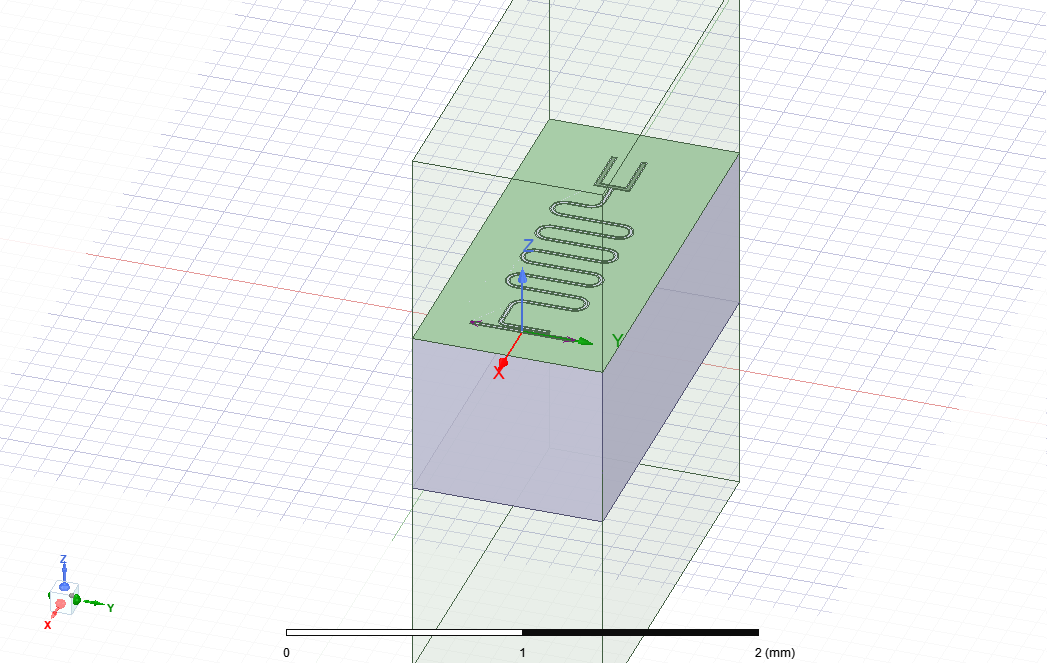

INFO 04:36PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


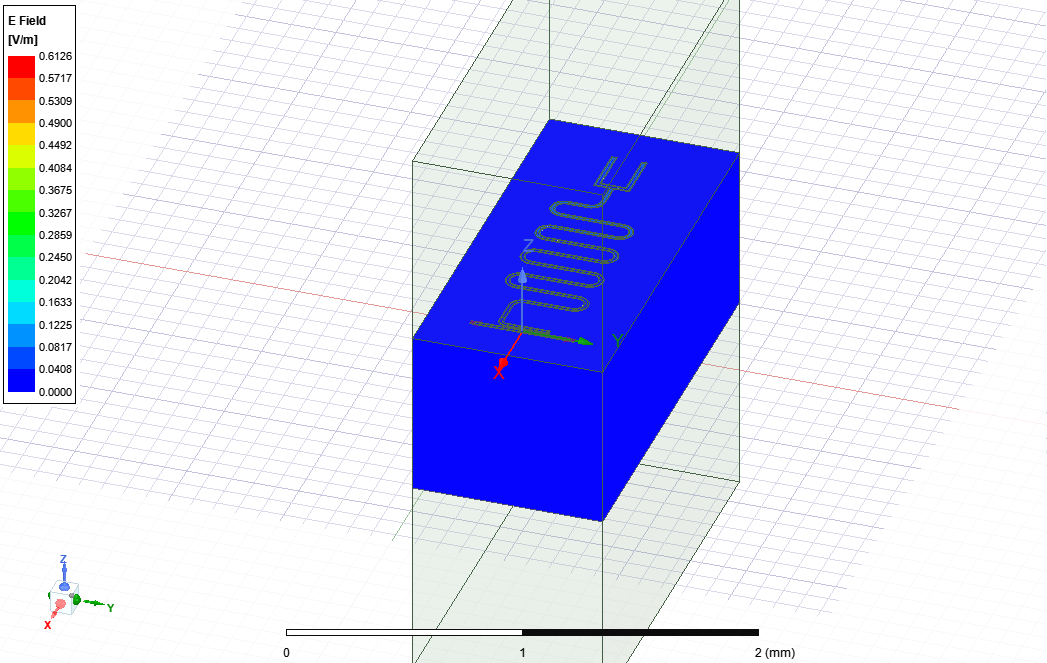

Design "CLT__claw215um_Sabrina_06122023_15.55.38_hfss" info:
	# eigenmodes    1
	# variations    1
Design "CLT__claw215um_Sabrina_06122023_15.55.38_hfss" info:
	# eigenmodes    1
	# variations    1
freq = 6.357 GHz
Q = 53291.5
kappa = 0.119 MHz


In [8]:
CLT_epr_sweep(design, sweep_opts = CLT_opts_dict[index], comp_name=comp_id)

In [24]:
from qiskit_metal.analyses.quantization import LOManalysis
c1 = LOManalysis(design, "q3d")

c1.sim.setup.reuse_selected_design = False
c1.sim.setup.reuse_setup = False

# example: update single setting
c1.sim.setup.max_passes = 30
c1.sim.setup.min_converged_passes = 1
c1.sim.setup.percent_error = 0.1
c1.sim.setup.name = 'sweep_setup'

qname = f"xmon{index}"
cname = "readout"
Lj = CLT_opts_dict[index]["claw_opts"]["aedt_hfss_inductance"]
CLT_opts_dict[index]["claw_opts"]["aedt_hfss_inductance"]=Lj,
CLT_opts_dict[index]["claw_opts"]["hfss_inductance"]=Lj, 
CLT_opts_dict[index]["claw_opts"]["q3d_inductance"]=Lj,
CLT_opts_dict[index]["claw_opts"]["aedt_q3d_inductance"]=Lj
q = TransmonCross(design, f"xmon{index}", options=CLT_opts_dict[index]["claw_opts"])
design.rebuild()
selection = [f"xmon{index}"]
open_pins = [(f"xmon{index}", "readout")]
print(q.options)
c1.sim.run(name = 'LOMv2.0', components=selection,
               open_terminations=open_pins)
cap_df = c1.sim.capacitance_matrix

print(cap_df)

data = {
    "design_options": design.components[qname].options,
    "data": {
        "cross_to_ground": 0 if 'ground_main_plane' not in cap_df.loc[f'cross_{qname}'] else cap_df.loc[f'cross_{qname}']['ground_main_plane'],
        "claw_to_ground": 0 if 'ground_main_plane' not in cap_df.loc[f'{cname}_connector_arm_{qname}'] else cap_df.loc[f'{cname}_connector_arm_{qname}']['ground_main_plane'],
        "cross_to_claw": cap_df.loc[f'cross_{qname}'][f'{cname}_connector_arm_{qname}'],
        "cross_to_cross": cap_df.loc[f'cross_{qname}'][f'cross_{qname}'],
        "claw_to_claw": cap_df.loc[f'{cname}_connector_arm_{qname}'][f'{cname}_connector_arm_{qname}'],
        "ground_to_ground": 0 if 'ground_main_plane' not in cap_df.loc[f'cross_{qname}'] else cap_df.loc['ground_main_plane']['ground_main_plane']
    },
    "sim_info": {
        "setup": c1.sim.setup,
        "renderer_options": c1.sim.renderer.options
    }
}
save_simulation_data_to_json(data, filename = f"qubitonly_num{index}_{comp_id}_v{version_num}")

{'pos_x': '-1500um', 'pos_y': '0.0um', 'orientation': '-90', 'chip': 'main', 'layer': '1', 'connection_pads': {'readout': {'connector_type': '0', 'claw_length': '215um', 'ground_spacing': '10um', 'claw_width': '15um', 'claw_gap': '5.1um', 'claw_cpw_length': '0um', 'claw_cpw_width': '11.7um', 'connector_location': '90'}}, 'cross_width': '30um', 'cross_length': '240um', 'cross_gap': '30um', 'hfss_inductance': ((9.686e-09,),), 'hfss_capacitance': 0, 'hfss_resistance': 0, 'hfss_mesh_kw_jj': 7e-06, 'q3d_inductance': ((9.686e-09,),), 'q3d_capacitance': 0, 'q3d_resistance': 0, 'q3d_mesh_kw_jj': 7e-06, 'gds_cell_name': 'my_other_junction', 'aedt_q3d_inductance': (9.686e-09,), 'aedt_q3d_capacitance': 0, 'aedt_hfss_inductance': ((9.686e-09,),), 'aedt_hfss_capacitance': 0}


INFO 04:58PM [connect_design]: 	Opened active design
	Design:    LOMv2.0_q3d26 [Solution type: Q3D]
WARNING 04:58PM [connect_setup]: 	No design setup detected.
WARNING 04:58PM [connect_setup]: 	Creating Q3D default setup.
INFO 04:58PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)


<COMObject GetModule>


INFO 04:58PM [get_setup]: 	Opened setup `sweep_setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 04:58PM [analyze]: Analyzing setup sweep_setup
INFO 05:01PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpv3r7_7ip.txt, C, , sweep_setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 05:01PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpv0ptvl90.txt, C, , sweep_setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 05:01PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpcvpagu50.txt, C, , sweep_setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 05:01PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpl1yyu1g4.txt, C, , sweep_setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 3, False
INFO 05:01PM [get_matrix]: Exporting matrix dat

                             cross_xmon1  ground_main_plane  \
cross_xmon1                    126.23388         -118.11007   
ground_main_plane             -118.11007          276.48395   
readout_connector_arm_xmon1     -5.71024         -104.49744   

                             readout_connector_arm_xmon1  
cross_xmon1                                     -5.71024  
ground_main_plane                             -104.49744  
readout_connector_arm_xmon1                    110.73630  


### Analysis

In [11]:
import numpy as np
import scqubits as scq

# Constants
e = 1.602e-19  # elementary charge in C
hbar = 1.054e-34  # reduced Planck constant in Js
Z_0 = 50  # in Ohms

def find_g_a(C_g, C_B, f_r, Lj, N):
    C_Sigma = C_g + C_B # + 1.5e-15
    omega_r = 2 * np.pi * f_r
    EJ = ((hbar / 2 / e) ** 2) / Lj * (1.5092e24) # 1J = 1.5092e24 GHz
    EC = e**2/(2*C_Sigma) * (1.5092e24) # 1J = 1.5092e24 GHz

    transmon = scq.Transmon(EJ=EJ,
                            EC=EC,
                            ng = 0,
                            ncut = 30)

    a = transmon.anharmonicity() * 1000 # linear MHz
    g = ((C_g / C_Sigma) * omega_r * np.sqrt(N * Z_0 * e**2 / (hbar * np.pi) )* (EJ/(8*EC))**(1/4)) / 1E6 / (2 * np.pi) # linear MHz
    f_q = transmon.E01() # Linear GHz
    
    return g, a, f_q

In [25]:
import json

lom_json = open(f"qubitonly_num1_Sabrina_v1.json") # PASTE IN CUSTOM FILENAME

data_lom = json.load(lom_json)

print(data_lom["data"])

emode_json = open(f"CLT__claw215um_Sabrina_06122023_16.36.19.json") # PASTE IN CUSTOM FILENAME

data_emode = json.load(emode_json)

# print(data_emode["design_options"]["geometry_dict"]["claw_opts"]["hfss_inductance"][0])
print(data_emode["sim_results"])

{'cross_to_ground': -118.11007, 'claw_to_ground': -104.49744, 'cross_to_claw': -5.71024, 'cross_to_cross': 126.23388, 'claw_to_claw': 110.7363, 'ground_to_ground': 276.48395}
{'cavity_frequency': 6357280607.559999, 'Q': 53291.53017317858, 'kappa': 119292.513968}


In [32]:
data = {}

cross2cpw = abs(data_lom["data"]["cross_to_claw"]) * 1e-15
cross2ground = abs(data_lom["data"]["cross_to_ground"]) * 1e-15
f_r = data_emode["sim_results"]["cavity_frequency"]
Lj = data_lom["design_options"]["hfss_inductance"][0][0]
# print(Lj)
gg, aa, ff_q = find_g_a(cross2cpw, cross2ground, f_r, Lj, N=4)
data.update({f"system_{index}": dict(
    f_cavity = f_r,
    Q = data_emode["sim_results"]["Q"],
    kappa = data_emode["sim_results"]["kappa"],
    g = gg,
    a = aa,
    f_qubit = ff_q
)})

print(data)

{'system_1': {'f_cavity': 6357280607.559999, 'Q': 53291.53017317858, 'kappa': 119292.513968, 'g': 69.93680333621688, 'a': -170.67793569512446, 'f_qubit': 4.43096520873976}}


In [ ]:
save_simulation_data_to_json(data, filename = f"qubitonly_num{index}_{comp_id}_v{version_num}")